In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from Bio import SeqIO
import matplotlib.figure as figure
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import pandas as pd
import scipy.cluster.hierarchy as hc

Classification of Amino Acids in the Pfizer Vaccine Spike Encoding Region:

Pie Chart Graph

The Pfizer vaccine mRNA sequence was published to GitHub by Andrew Fire, Massa Shoura, and others at the Stanford University Departments of Pathology, Genetics, Pediatrics, and Medicine. This first plot examines the spike encoding region of the vaccine sequence in order to determine the breakdown of classifications of the amino acids based on their R-groups. 

Aliphatic amino acids: Glycine, Alanine, Valine, Proline, Methionine, Isoleucine, and Leucine, contain nonpolar, hydrophobic R-groups which stabilize the protein.
Aromatic amino acids: Phenylalanine, Tyrosine, Tryptophan, contain an aromatic ring and participate in hydrophobic interactions.
Polar amino acids: Serine, Threonine, Cysteine, Glutamine, Asparagine, contain polar, hydrophilic R-groups that form hydrogen bonds with water
Acidic amino acids: Glutamate, Aspartate, contain two acidic carboxyl groups and one basic alpha-amino group, they have a net negative charge and are acidic.
Basic amino acids: Histidine, Lysine, Arginine, contain two basic groups and one acidic carboxyl group, they have a net positive charge and are basic.

The spike encoding region of the Pfizer vaccine appears to contain a significant amount of aliphatic amino acid, reflecting the nonpolar hydrophobic characteristics of the spike protein which allow it to interact with the phospholipid bilayer membrane.

Source:
Andrew Fire, Massa Shoura, et al. "Assemblies of putative SARS-CoV2-spike-encoding mRNA sequences for vaccines BNT-162b2 and mRNA-1273". (2021). GitHub Repository. https://github.com/NAalytics/Assemblies-of-putative-SARS-CoV2-spike-encoding-mRNA-sequences-for-vaccines-BNT-162b2-and-mRNA-1273/blob/main/Assemblies%20of%20putative%20SARS-CoV2-spike-encoding%20mRNA%20sequences%20for%20vaccines%20BNT-162b2%20and%20mRNA-1273.docx.pdf.

Khan, Rizwan Hasan & Siddiqi, Mohammad & Salahuddin, Parveen. (2017). Protein Structure and Function. https://www.researchgate.net/publication/316139245_Protein_Structure_and_Function#pf4

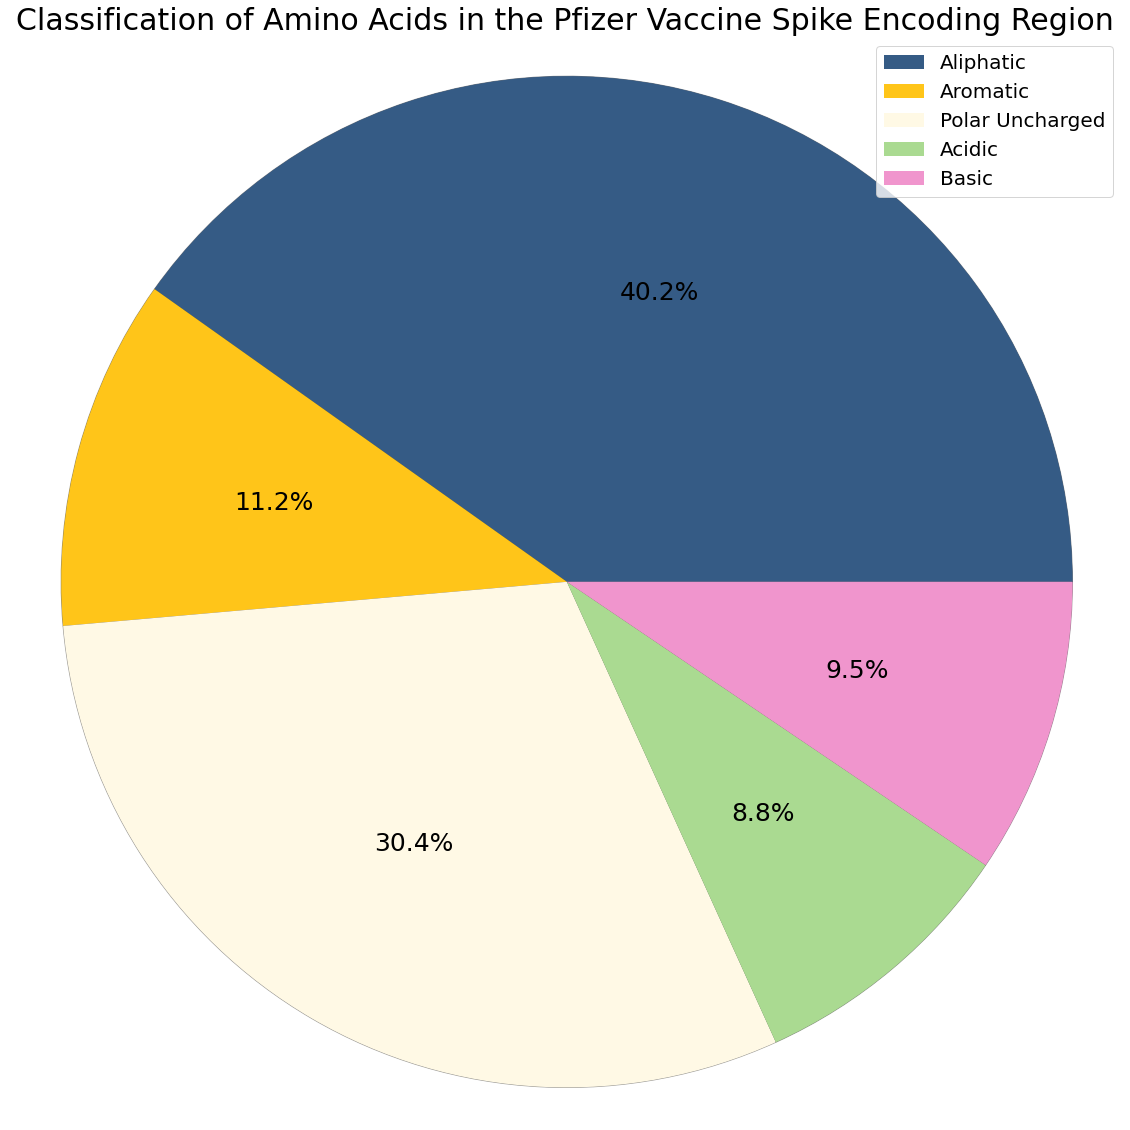

In [4]:
pfizer = "pfizerspike.txt"

def codons_to_aminos(codons:list, aminos:list):
    Ala = ['GCT', 'GCC', 'GCA', 'GCG']
    Arg = ['CGT', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG']
    Asn = ['AAT', 'AAC']
    Asp = ['GAT', 'GAC']
    Cys = ['TGT', 'TGC']
    Gln = ['CAA', 'CAG']
    Glu = ['GAA', 'GAG']
    Gly = ['GGT', 'GGC', 'GGA', 'GGG']
    His = ['CAT', 'CAC']
    Ile = ['ATT', 'ATC', 'ATA']
    Leu = ['TTA', 'TTG', 'CTT', 'CTC', 'CTA', 'CTG']
    Lys = ['AAA', 'AAG']
    Met = ['ATG']
    Phe = ['TTT', 'TTC']
    Pro = ['CCT', 'CCC', 'CCA', 'CCG']
    Ser = ['TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC']
    Thr = ['ACT', 'ACC', 'ACA', 'ACG']
    Trp = ['TGG']
    Tyr = ['TAT', 'TAC']
    Val = ['GTT', 'GTC', 'GTA', 'GTG']
    stop = ['TAA', "TGA", 'TAG']
    for i in codons:
        if i in Ala:
            aminos.append('Ala')
        elif i in Arg:
            aminos.append('Arg')
        elif i in Asn:
            aminos.append('Asn')
        elif i in Asp:
            aminos.append('Asp')
        elif i in Cys:
            aminos.append('Cys')
        elif i in Gln:
            aminos.append('Gln')
        elif i in Glu:
            aminos.append('Glu')
        elif i in Gly:
            aminos.append('Gly')
        elif i in His:
            aminos.append('His')
        elif i in Ile:
            aminos.append('Ile')
        elif i in Leu:
            aminos.append('Leu')
        elif i in Lys:
            aminos.append('Lys')
        elif i in Met:
            aminos.append('Met')
        elif i in Phe:
            aminos.append('Phe')
        elif i in Pro:
            aminos.append('Pro')
        elif i in Ser:
            aminos.append('Ser')
        elif i in Thr:
            aminos.append('Thr')
        elif i in Trp:
            aminos.append('Trp')
        elif i in Tyr:
            aminos.append('Tyr')
        elif i in Val:
            aminos.append('Val')
    return aminos
with open(pfizer) as pf:
    pf_sequence=pf.readline()
pf_codons=[(pf_sequence[i:i+3]) for i in range(0, len(pf_sequence), 3)]
pf_aminos = []
codons_to_aminos(pf_codons, pf_aminos)

#R groups Classification
Aliphatic = ['Gly', 'Ala', 'Val', 'Pro', 'Met', 'Ile', 'Leu']
Aromatic = ['Trp', 'Phe', 'Tyr']
Polar_uncharged = ['Ser', 'Thr', 'Cys', 'Gln', 'Asn']
Acidic_Aminos = ['Glu', 'Asp']
Basic_Aminos = ['His', 'Lys', 'Arg']

num_aliphatic=0
num_aromatic = 0
num_polar = 0
num_acidic = 0
num_basic = 0
num_gly = 0
num_pro = 0

for i in pf_aminos:
    if i == 'Gly':
        num_gly+=1
    if i == 'Pro':
        num_pro+=1
    if i in Aliphatic:
        num_aliphatic+=1
    elif i in Aromatic:
        num_aromatic+=1
    elif i in Polar_uncharged:
        num_polar+=1
    elif i in Acidic_Aminos:
        num_acidic +=1
    elif i in Basic_Aminos:
        num_basic +=1
     
fig, ax = plt.subplots(figsize = (20, 20))

labels = ['Aliphatic', 'Aromatic', 'Polar Uncharged', 'Acidic', 'Basic']
sizes = [num_aliphatic, num_aromatic, num_polar, num_acidic, num_basic]
colors = ['#355B85', '#FFC519', '#FFF9E5', '#AADA91', '#F095CD']

matplotlib.rcParams['font.size'] = 25
ax.pie(sizes, colors=colors, autopct='%1.1f%%', shadow = True, radius=200)
ax.set_title('Classification of Amino Acids in the Pfizer Vaccine Spike Encoding Region', fontsize = 30)
ax.legend(labels, fontsize = 20)
ax.axis('equal')
plt.show()
fig.savefig('Pfizer_Encoding.png')

Toxicology Report-Pfizer-BioNTech COVID-19 Vaccine:

Bar Graph

This code displays a bar graph of the toxicology report from the Pfizer Safety Data Sheet for their COVID-19 Vaccine. The 50% lethal dose (amount it takes to kill half the subjects) of potentially hazardous ingredients of the vaccine were tested: Sucrose, Sodium Chloride, Potassium Phosphate, Potassium Chloride, and Cholesterol. Rats, mice, and rabbits were used and the method of exposure is also indicated: orally(ingestion) or dermally(injection into the skin). 

Source:
Pzifer SAFETY DATA SHEET: Pfizer-BioNTech COVID-19 Vaccine. (2021).
https://safetydatasheets.pfizer.com/MyDocuments/DownloadSingleFile?content=E87D8763-BDFF-4631-A957-B9D8E52AFBD9_PDF

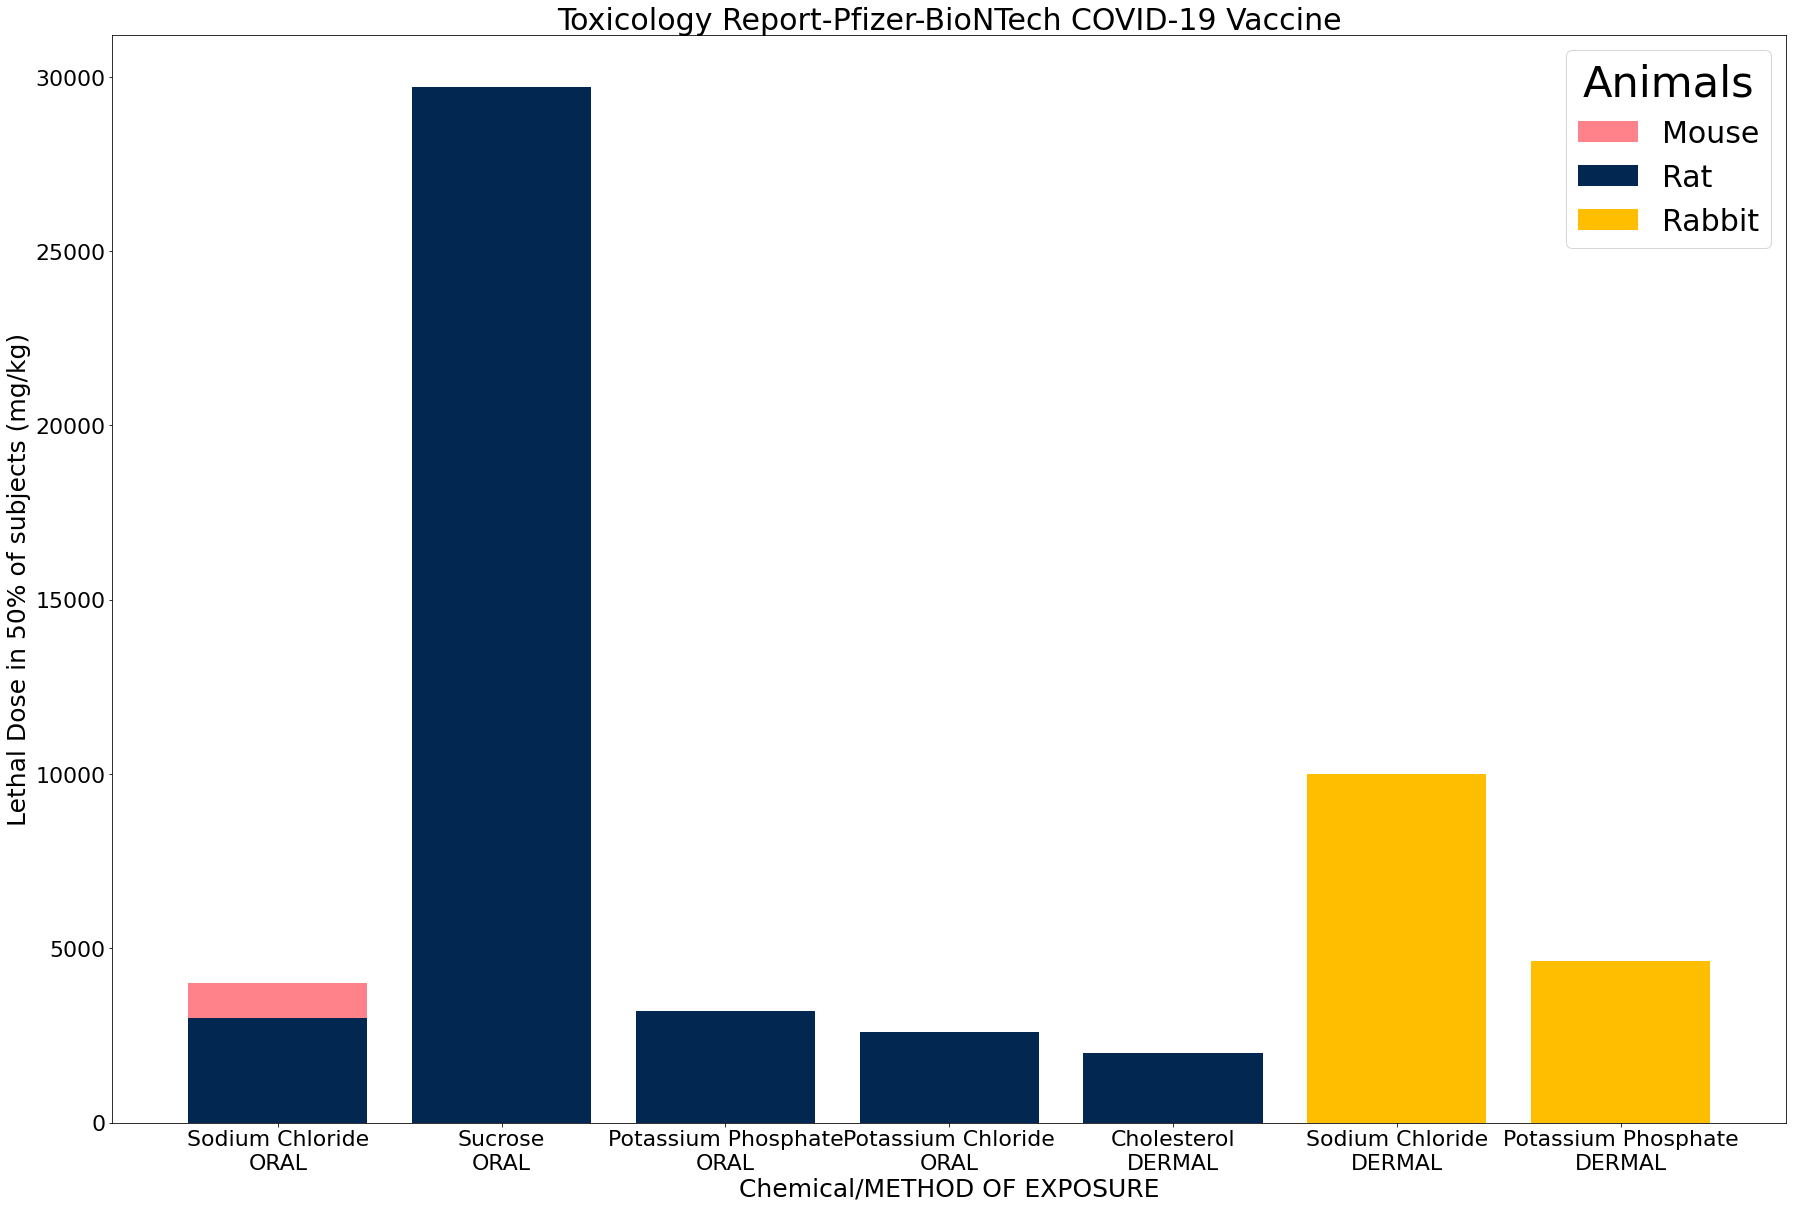

In [5]:
#data from the Safety Data Sheet
ratx = ['Sucrose\nORAL', 'Sodium Chloride\nORAL', 'Potassium Phosphate\nORAL', 'Potassium Chloride\nORAL', 'Cholesterol\nDERMAL']
raty = [29700, 3000, 3200, 2600, 2000]

rabbitx=['Sodium Chloride\nDERMAL', 'Potassium Phosphate\nDERMAL']
rabbity=[10000, 4640]

mousex=['Sodium Chloride\nORAL']
mousey=[4000]

#plotting a bar graph

fig, ax = plt.subplots(figsize=(30,20))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(22)


ax.bar(mousex,mousey, color = '#FF8189', label = 'Mouse')
ax.bar(ratx,raty, color='#022851', label = 'Rat')
ax.bar(rabbitx,rabbity,color='#FFBF00',label = 'Rabbit')
ax.set_xlabel('Chemical/METHOD OF EXPOSURE', size=25)
ax.set_ylabel('Lethal Dose in 50% of subjects (mg/kg)', size=25)
ax.set_title('Toxicology Report-Pfizer-BioNTech COVID-19 Vaccine',size=30)

plt.legend(title = 'Animals', fontsize = 30, title_fontsize = 'xx-large')
plt.show()
fig.savefig('Toxicology.png')

NCBI SARS-CoV-2 Genome Sequence Similarity in Asia (China, India, South Korea, Japan, Sri Lanka, Taiwan:

Dendrogram Graph

The NCBI Virus database contains all sequences of SARS-CoV-2 with the reference isolated Wuhan sequence as NC_045512.2, of length 29,903. In order to avoid false "deviations," only completed genome sequences of the same length were selected for comparison. As some scientists started at different points of the sequence, frameshifting occurred in some comparisons and impossibly high numbers of nucleotide deviations were accounted for by filtering out all sequences where the number of deviations exceeded 500. What resulted was a dendogram of 200 sequences mapping the similarity of different sequences of the virus over various dates and locations in Asia, in comparison to the original Wuhan isolate reference sequence. As could be expected, most deviated by only a few nucleotides which could be due to mutations, which are common in RNA viruses like SARS-CoV-2. These mutations could weaken, strengthen, or have no effect of the virus though, due to the frequency of mutations, new variants of SARS-CoV-2 is cause for concern. 

Source:
Hatcher EL, Zhdanov SA, Bao Y, Blinkova O, Nawrocki EP, Ostapchuck Y, Schaffer AA, Brister JR. Virus Variation Resource - improved response to emergent viral outbreaks. Severe acute respiratory syndrome coronavirus 2 data hub. (2020)
https://www.ncbi.nlm.nih.gov/labs/virus/vssi/#/virus?SeqType_s=Nucleotide&VirusLineage_ss=Wuhan%20seafood%20market%20pneumonia%20virus,%20taxid:2697049&Completeness_s=complete&SLen_i=29903%20TO%2029903&Country_s=China&Country_s=India&Country_s=Japan&Country_s=South%20Korea&Country_s=Sri%20Lanka&Country_s=Taiwan

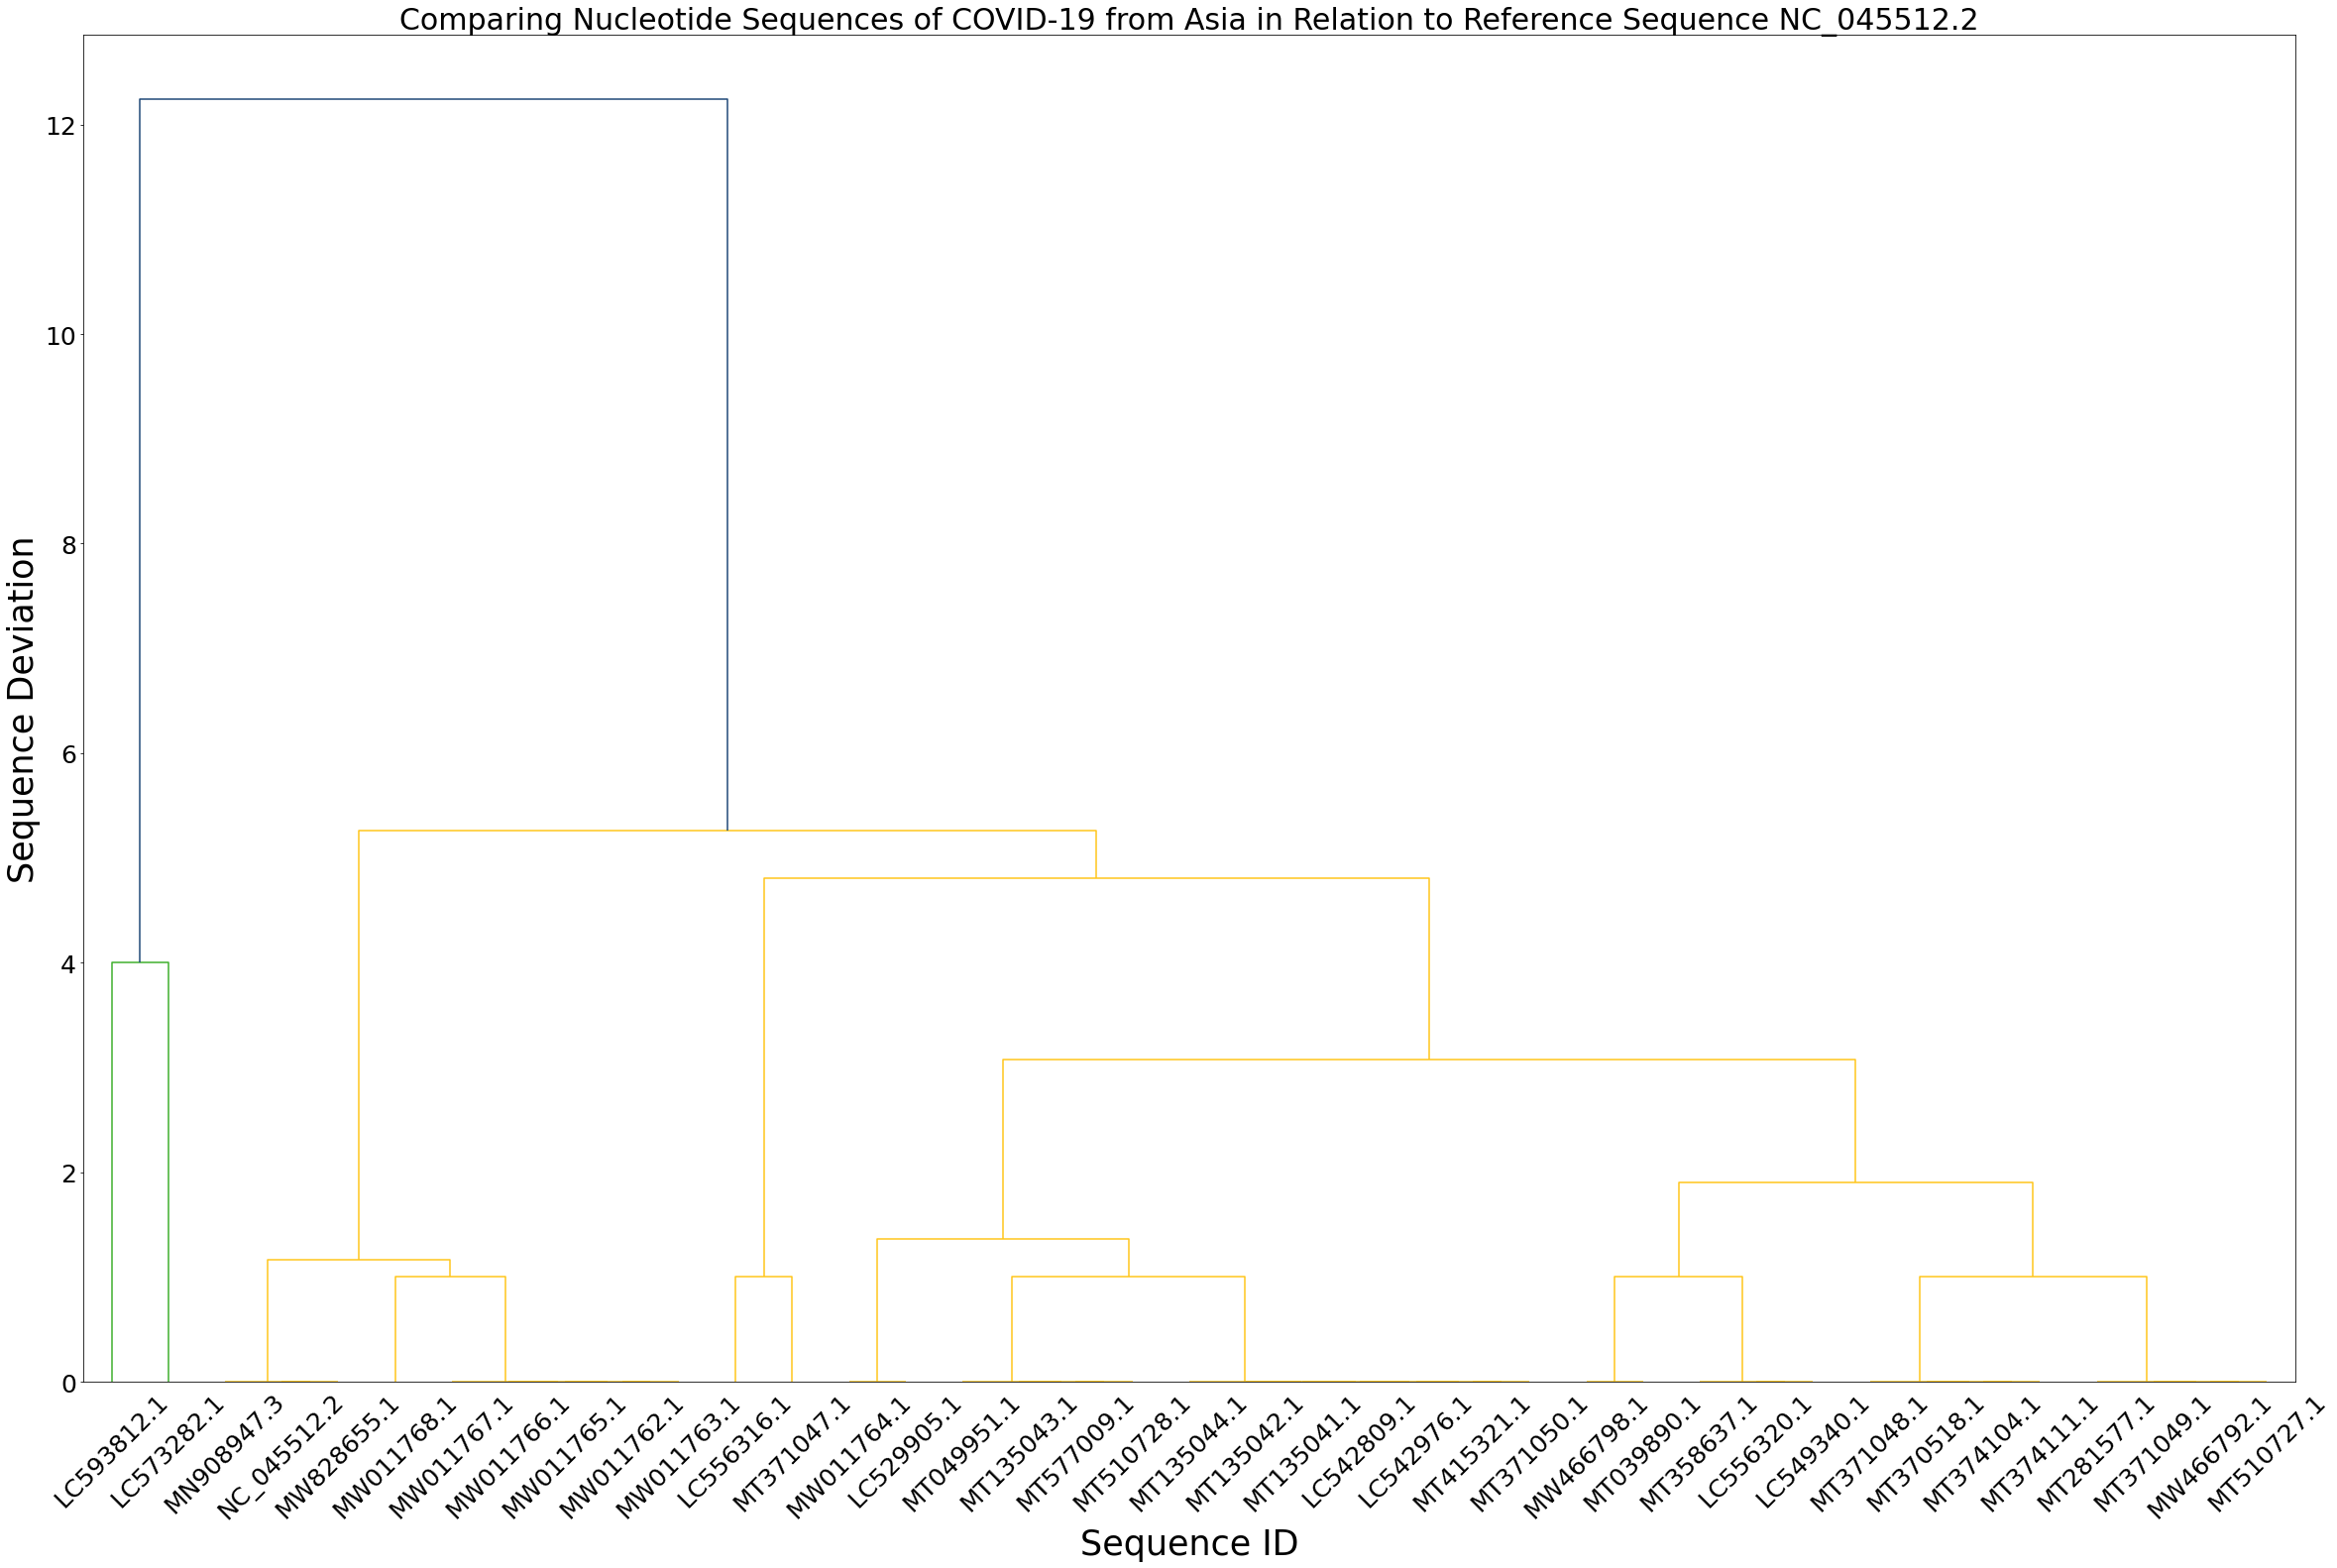

In [21]:
#parse refsq.fasta (reference sequence) and asia.fasta, a file containing all completed COVID-19 sequences from Asia with a length equal to reference sequence NC_045512.2
fasta_sequences = SeqIO.parse(open('asia_seq.fasta'),'fasta')
ref_sq = SeqIO.parse(open('refsq.fasta'), 'fasta')
for fasta in ref_sq:
    ref_name, ref_sequence = fasta.id, str(fasta.seq)
sequences = []
cur_seq = []

#filter out outlying distances, which likely signal manual removal of segments of the sequence/different starting/end points causing artificial frameshifts
for fasta in fasta_sequences:
    name, sequence = fasta.id, str(fasta.seq)
    distance = 0

    for i in range(0,len(sequence)):
        if sequence[i] != ref_sequence[i]:
            distance +=1

    if distance < 500:
        cur_seq.append(name)
        cur_seq.append(distance)
        sequences.append(cur_seq)
    cur_seq = []
    distance = 0
    
#create dataframe from the names and their distances
df = pd.DataFrame(sequences,columns = ['name', 'distance'])  


fig, ax = plt.subplots(figsize = (40, 25))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(25)

ax.set_title('Comparing Nucleotide Sequences of COVID-19 from Asia in Relation to Reference Sequence NC_045512.2', fontsize = 30)
ax.set_xlabel('Sequence ID', fontsize = 35)
ax.set_ylabel('Sequence Deviation', fontsize= 35)

#create a correlation distance matrix 
i, d = df['name'].values, df['distance'].values 
df = pd.DataFrame(np.abs(d[:, None] - d), index=i, columns=i)
condensed_df = hc.distance.squareform(df) #condense
z = hc.linkage(condensed_df, method='average')

#create and customize the dendrogram
hc.set_link_color_palette(['#3DAE2B', '#FFC519', '#191919'])
dendrogram = hc.dendrogram(z, labels=df.columns, leaf_font_size=25, above_threshold_color='#1D4776')
plt.show()
fig.savefig('Seq_compare.png')

In [20]:
df

,name,distance
0,NC_045512.2,0
1,MW828655.1,0
2,MW466792.1,6
3,MW466798.1,9
4,LC593812.1,19
5,MT577009.1,5
6,MW011762.1,1
7,MW011763.1,1
8,MW011764.1,3
9,MW011765.1,1


In [16]:
df

,NC_045512.2,MW828655.1,MW466792.1,MW466798.1,LC593812.1,MT577009.1,MW011762.1,MW011763.1,MW011764.1,MW011765.1,...,MT358637.1,MT281577.1,LC529905.1,MT135041.1,MT135042.1,MT135043.1,MT135044.1,MT049951.1,MT039890.1,MN908947.3
NC_045512.2,0,0,6,9,19,5,1,1,3,1,...,8,6,3,4,4,5,4,5,9,0
MW828655.1,0,0,6,9,19,5,1,1,3,1,...,8,6,3,4,4,5,4,5,9,0
MW466792.1,6,6,0,3,13,1,5,5,3,5,...,2,0,3,2,2,1,2,1,3,6
MW466798.1,9,9,3,0,10,4,8,8,6,8,...,1,3,6,5,5,4,5,4,0,9
LC593812.1,19,19,13,10,0,14,18,18,16,18,...,11,13,16,15,15,14,15,14,10,19
MT577009.1,5,5,1,4,14,0,4,4,2,4,...,3,1,2,1,1,0,1,0,4,5
MW011762.1,1,1,5,8,18,4,0,0,2,0,...,7,5,2,3,3,4,3,4,8,1
MW011763.1,1,1,5,8,18,4,0,0,2,0,...,7,5,2,3,3,4,3,4,8,1
MW011764.1,3,3,3,6,16,2,2,2,0,2,...,5,3,0,1,1,2,1,2,6,3
MW011765.1,1,1,5,8,18,4,0,0,2,0,...,7,5,2,3,3,4,3,4,8,1


Accuracy of COVID-19 Test Sensitivity of SARS-CoV-2 Antibodies:

Histogram

Various COVID-19 Tests have been created; one type, the Serology test, is used to assess whether a patient has developed an immune response to the virus. These tests have been evaluated for accurancy in sensing the SARS-CoV-2 antibodies in time intervals of 0-7 days, 7-14 days, and 15+ days since infection. Rutgers Insitute for Health, Health Care Policy and Aging Research has compiled the lab results of these tests and a those that contain data for 0-7, 7-14, and 15+ days have been selected here to create a histogram demonstrating the accuracy of their sensing. These tests include: Maverick SARS-CoV-2 Multi-Antigen Serology Panel v2, UBI SARS-CoV-2 ELISA, Dimension EXL SARS CoV 2 IgG (CV2G), Dimension Vista SARS CoV 2 IgG (COV2G), ADVIA Centaur IL6 assay, EliA SARS-CoV-2-Sp1 IgG Test, Q-Plex SARS-CoV-2 Human IgG (4 Plex), COVID-SeroKlir, Kantaro Semi-Quantitative SARS-CoV-2 IgG Antibody Kit, SGTi-flex COVID-19 IgG, MAGLUMI 2019-nCoV IgM/IgG, Access SARS-CoV-2 IgG, and the BIOTIME SARS-CoV-2 IgG/IgM Rapid Qualitative Test.

Source:
Rutgers Insitute for Health, Health Care Policy and Aging Research. COVID-19 Testing Data. (2020) https://ifh.rutgers.edu/covid-test/


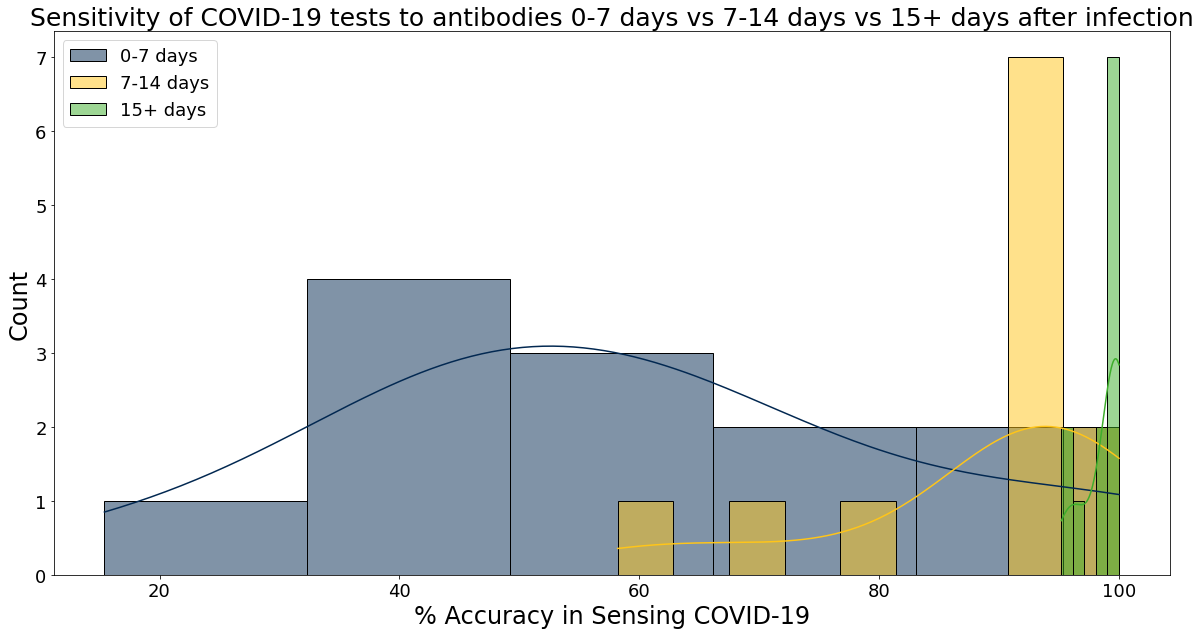

In [5]:
#data from Rutgers (was not downloadable, and had to manually select tests with correct data ranges)
Sensitivity_7 =  [66.7, 38.5, 61.1, 61.1, 53.5, 15.4, 100, 100, 41.2, 43.8, 75, 46.38]
Sensitivity_14 = [90.91, 79.5, 92.9, 92.9, 93.4, 58.2, 100, 100, 91.7, 93.4, 95.3, 67.65]
Sensitivity_15 = [96.1, 100, 100, 100, 100, 99.4, 95.2, 98.87, 98.6, 100, 96.8, 100]

#using seaborn with matplotlib to plot many histograms in different colors
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(data=Sensitivity_7, color="#022851", label= '0-7 days', kde=True)
sns.histplot(data=Sensitivity_14, color="#FFC519", label = '7-14 days', kde=True)
sns.histplot(data=Sensitivity_15, color = '#3DAE2B', label = '15+ days', kde = True)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(18)
ax.set_title('Sensitivity of COVID-19 tests to antibodies 0-7 days vs 7-14 days vs 15+ days after infection', fontsize = 25)
ax.set_xlabel('% Accuracy in Sensing COVID-19', fontsize = 24 )
ax.set_ylabel('Count', fontsize = 24)
plt.legend(fontsize = 18)

fig.savefig('Test_sense.png')